# Notebook 1 - Working with tabulated data 
----------------------------------------------------------------

## Table of Content <a id='toc' />

1. **[Reading tabulated data](#1)**  
    1.1 [Reading data from a file](#11)  
    1.2 [Setting row names (the index)](#12)  
    1.3 [Summary of `pd.read_table()` arguments](#13)  
    1.4 [Reading other tabulated file formats](#14)  
    <br>

2. **[Data manipulation: selecting rows and columns](#2)**  
    2.1 [Accessing and setting row and column names](#21)  
    2.2 [Accessing single/multiples columns by name](#22)  
    2.3 [Deleting columns](#23)  
    2.4 [Data types](#24)  
    <br>

3. **[DataFrame subsetting](#3)**  
    3.1 [Accessing specific rows and columns](#31)  
    3.2 [Conditional selection](#32)  
    <br>
    
4. **[Operations on columns](#4)**  
    4.1 [Arithmetic operations](#41)  
    4.2 [Applying built-in summary functions](#42)  
    4.3 [Applying custom functions](#43)  
    <br>

5. **[Writing DataFrames to disk](#5)**
   <br>

**Supplementary Material - [Additional topics, not covered in class](#a)**  
  * Annex 1 - [Sorting operations on dataframes](#a1)  
  * Annex 2 - [Dropping rows with missing values](#a2)  
  * Annex 3 - [Grouping data by factor](#a3)  
  * Annex 4 - [Creating DataFrames and Series from scratch](#a4)  
  * Annex 5 - [Concatenate, merge and join DataFrames](#a5)  
  * Annex 6 - [Mixed selection by names and positions for `.loc[]` and `.iloc[]`](#a6)  
  * Annex 7 - [more ways to add rows to a DataFrame](#a7)
  * Annex 8 - [Wide and long format](#a8)  
  
<br>
<br>

## Introduction

The basis of any statistical analysis is the underlying data, and very often data are stored in **tabular format**:
 * Each **line** corresponds to an observation (individual, sample, ... ).
 * Each **column** correspond to a measured variable (height, sex, gene expression, ... ).

In python, the most popular module to read and manipulate tabulated data is certainly **[pandas](https://pandas.pydata.org)**, a "high-level" module designed for data manipulation and exploratory analysis. A great strength of pandas is its **DataFrame** object which emulates many of the convenient behaviors and syntax of its eponym counterpart in the **R** language.

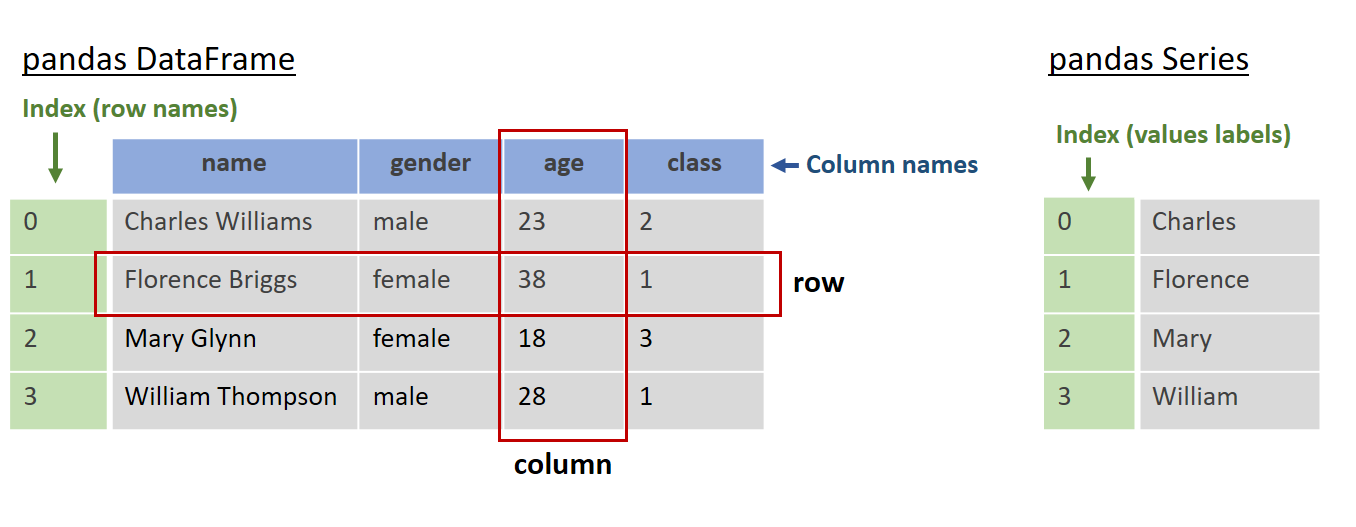

<br>

To graphically represent data, we will rely on the **[seaborn](https://seaborn.pydata.org)** library.
Seaborn is designed to work hand-in-hand with pandas DataFrame to produce **efficient data representation** from fairly simple commands. The seaborn official website proposes [very good tutorials](https://seaborn.pydata.org/tutorial.html) as well as a [gallery](https://seaborn.pydata.org/examples/index.html) with associated code to get you started quickly.

<br>

### Loading the pandas and seaborn modules

By convention, pandas is imported as **`pd`** and seaborn as **`sns`**:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All modules loaded successfully!")

> *Note:* if you are missing some of the above modules, you should install them.
>
>    * Installation with **conda**: `conda install -c conda-forge pandas matplotlib seaborn numpy`
>    * Installation with **pip**: `pip install --user pandas matplotlib seaborn numpy` 

<br>

Making the plotted labels a bit bigger for presentation with a projector... you do **not need to run this cell**.

In [ ]:
import matplotlib as mpl

font = {"family": "DejaVu Sans",
        "weight": "bold",
        "size"  : 16}

mpl.rc("font", **font)

<br>

### Alternatives to Pandas

To this day, the **Pandas** library is certainly the the most popular and most used library for manipulation of tabular data in Python, which is why we present it in this course.

However, there exists alternative, and in particular the [polars](https://pola.rs) library, which has been developed relatively recently and can be a good alternative when processing extremely large datasets.

Here are some links comparisons between the pandas and the polars library:

* Performance comparison:
    * https://www.datacamp.com/tutorial/high-performance-data-manipulation-in-python-pandas2-vs-polars 
    * https://medium.com/cuenex/pandas-2-0-vs-polars-the-ultimate-battle-a378eb75d6d1 
* Usability comparison
    * https://www.confessionsofadataguy.com/replacing-pandas-with-polars-a-practical-guide 



<br>
<br>

[Back to ToC](#toc)

# 1. Reading tabulated data <a id='1' />
----------------------------------------

In most cases, the data we want to work with is stored in a file on disk. The very first step is therefore to **load the data as a DataFrame**.

## 1.1 Reading data from a file <a id='11' />

* **`pd.read_table(<file path and name>)`** is the generalist pandas function to **read tabulated data files**. It's only required argument is the name (and optionally path) of the file to read from.

> By default, python is searching for files in your current working directory. If the file you wish to load
  is not located there, you need to specify its path, either absolute or relative to the working directory.
  
<br>

**Let's now try to load the file `data/titanic.csv`**. As its name suggest, this file contains the popular dataset of the ill-fated [Titanic](https://en.wikipedia.org/wiki/Titanic) passengers, traveling from England to New York in April 1912.  
* The file `titanic.csv` is located in a `data/` subdirectory of our current working directory. We must
  therefore pass `data/titanic.csv` as argument to `pd.read_table()`.
* The data file is named `titanic.csv` and, as its extension suggests, contains **C**omma-**S**eparated **V**alues.

> *Note:* the dataset we are using here is *not* the complete list of people that were on the Titanic.
> There were around 2240 people on board - precise numbers are disputed due to duplicate entries, people
> traveling under pseudonyms, last minute cancellations and last minute replacements of people.

In [ ]:
# Import the pandas module, if not done yet.
import pandas as pd

df = pd.read_table("data/titanic.csv")
df

There seems to be a problem loading the data... there is a single column in our `DataFrame`, but we expected to have 8 columns!  
Let's try to solve this in the first Micro-Exercise of this notebook, just below.

<br>

**Tip:** it is often practical to **display only a small part of a DataFrame**. This can be done with the **`.head()`** and **`.tail()`** methods of `DataFrame`.

* By default, `head()`/`tail()` returns the first/last 5 rows of a DataFrame.
* To return a different number of rows, a value can be passed: e.g. `head(10)` returns the first 10 rows.

In [ ]:
df.head()  # By default, head() returns the first 5 rows of a DataFrame.

<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 1
* Try to fix the cell just above (the loading of `data/titanic.csv`) by looking at the arguments of
  the **`pd.read_table()`** function.
  For this, you can use `help(pd.read_table)`, or the
  [online help](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html).
* **If you have time:** try to find a pandas function that will read CSV files by default, i.e.
  without having to pass any additional option.  
  **Hint:** have a look at the pandas
  [input/output functions](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).
    
</div>


<br>
<br>
<br>

<center><b>Spoiler alert</b>: do not scroll or be spoiled!</center>

-----

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

As you have just seen, **`pd.read_table()`** expects (by default) the input data to be **tab-delimited**.
This is not the case of the `titanic.csv` file - which instead contains **comma-delimited** values (`.csv` stands for "**C**omma-**S**eparated **V**alues") - and therefore each line of the file was treated as a single field (column), creating a DataFrame with a single column.

To load a CSV file, we can either:
* Specify the separator value via the **`sep`** argument.
* Use **`pd.read_csv()`**, a dedicated function to load CSV files that uses commas as default separator.

```py
df = pd.read_table("data/titanic.csv", sep=",")  # Option 1: specify separator via the `sep` argument.
df = pd.read_csv("data/titanic.csv", sep=",")    # Option 2: use the `read_csv()` function.
df.head()
```

<br>

<div class="alert alert-block alert-info">
    
### Additional material: header or not header, that is the question <a id='12' />

Another important aspect of reading data is whether your dataset has a header or not.   
By default, **`pd.read_table()` treats the first line of a file as its header**, unless you either:
 * Use the argument **`header=None`**.
 * Specify column names using the **`names`** argument. The length of the sequence passed to `names`
   must match the number of columns in the file.

<br>

**Examples:**

* If a dataset has ne header, we pass `header=None` as argument to avoid that the first
  row of data gets used as header.
    ```py
    df = pd.read_table("data/titanic_no_header.csv", sep=",", header=None) 
    ```

<br>

* We can assign our own column names using the `names` argument of `pd.read_table()`.
    ```py
    df = pd.read_table(
    "data/titanic_no_header.csv",
    sep=",", 
    names=["name", "column2", "age", "column4", "blip", "bloop", "spam", "eggs"]
)
    ```
 
> *Note:* it is important that the length of the sequence passed to `names` matches the number of columns in the file, otherwise pandas will consider columns on the left as being part of the index (i.e. row names).
    
</div>


<br>
<br>

[Back to ToC](#toc)

## 1.2 Setting row names (the index) when loading a file <a id='12' />

> **Vocabulary reminder:** in pandas, the row names of a `DataFrame` are called the **index**.

### Case 1: input file contains no row names

* When a dataset does not contain any row names, pandas uses **default index** values:
  **integer numbers starting from 0**, corresponding to row positions (first row is `0`, 2nd row is `1`, ...).
* Not all dataset need a custom index. Oftentimes the default index is enough. In fact, unless there is
  a good reason to give specific row names, it can often be advantageous to have the index correspond to
  row positions.

In [ ]:
df = pd.read_csv("data/titanic.csv")
df.head()

<br>

### Case 2: input file contains row names (file has one less column names than data fields)

* Depending on how a data file was produced, it may already contain row names.
* If the **first row of a file contains one less field than the remaining rows**, pandas auto-detects
  the file as containing row names and uses them as index.

Let's see an example of this with the `data/titanic_implicit_index.csv` file.  
Here is the "raw" content of our file (i.e. we simply read the content of the file, without importing it as a DataFrame):

In [ ]:
with open("data/titanic_implicit_index.csv", mode="r") as f:
    for x in range(5):
        print(f.readline().strip())

As can be seen above, the 1st line of the file contains 7 elements, while all other lines contain 8 elements! This is because, in this file, the first field corresponds to row names rather than to an actual column. Since row names have no column name, **the first line of the file has one less field than the remaining lines**.

> **Tip:** if you are using a Linux or MacOS machine, you could also use the following one-liner shell command
> to display the first 5 lines of a plain text file:
>
> `!head -n 5 data/titanic_implicit_index.csv`
>
> The leading **`!`** is a special Jupyter Notebook syntax that indicates a call to a shell
> program (here `head`). This allows you to run shell commands from a Jupyter Notebook.

<br>

Let's see how pandas handles this data file:

In [ ]:
df = pd.read_csv("data/titanic_implicit_index.csv") 
df.head(3)

In [ ]:
# Let's have a look at the index (row names) values...
# Note: with [:5], we only select the first 5 elements (values 0 to 4).
df.index[:5]

<br>

When pandas detects that a file has one less value in the first line than in the remaining lines, it **automatically uses the first, nameless, column as index**.

<br>

<br>

<div class="alert alert-block alert-info">
    
### Additional material: using `index_col` to manually specify a column to use as index

Pandas can be instructed to use a specific column of an input file as index via the **`index_col`** argument of `pd.read_table()`.  
The index column can be indicated either:
* By position (*reminder:* column indexing is zero-based - the index of the first column is 0, not 1).
* By name.

<br>

**Examples:** use the first column (`index_col=0`) as index (row names).
    
```py
df = pd.read_table("data/pbmc_data.countMatrix.50.txt.zip", sep=" ", index_col=0)
df.head()
```

> *Notes:*
>  * As can be seen in the example above, Pandas can **read data in compressed files such as `.zip` files**.
>  * Removing the name of the index (`Name` in the example above) can be done
>    with: **`df.index.name = None`**
>  * Pandas also has a system of multiple, hierarchized indexing. This is, however,
>    a more specialized and advanced feature. You can read more about it
>    [here in the pandas doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#multiindex-advanced-indexing).
    
</div>

<br>
<br>

[Back to ToC](#toc)

## 1.3 Summary of `pd.read_table()` arguments <a id='13' />

We have seen above a few of the most useful of the **optional** arguments of **`pd.read_table()`**:

* **`sep`**: the separator between columns/fields in the file. The default value for this argument
  is `"\t"`, a tab.
* **`header`**: the **row number to use as the column names** (all rows above it are skipped).
  By default the first line of the file is used as header.
  Use **`header=None` if the file does not contain column names**.
* **`names`**: sequence of strings to use as **column names**. The length of the sequence should match the
  of columns in the file.
* **`index_col`**: column number or name to use as index (**row names**) of the DataFrame.

<br>

<div class="alert alert-block alert-info">

### Additional material: more optional arguments of `pd.read_table()`

`pd.read_table()` has many more optional arguments. Here is a small selection which may be of interest to you:

* **`skiprows`**: allows to skip the specified rows (lines of the file) during import. This can be either
  a sequence of lines to skip (0-indexed), or an integer number indicating how many lines to skip
  at the start of the file.
* **`na_values`**: takes a list. Allows you to define your own NA values. Ideal when your NAs are
  encoded as something unusual (eg, `.`,` `,`-9999`,...).
* **`true_values`**/**`false_values`**, each a list indicating which values should be converted to
  `true` or `false`. E.g. you might have columns encoded with "yes"/"no" labels that you want to
  change into `true`/`false`.
* **`compression`**: your data is in a compressed format (zip, gzip, ...)? Not a problem!  
  Note that common compression formats (such as `zip`, `gzip`) are automatically detected by pandas
  and there is no need to add this option.
* `parse_dates`/`infer_datetime_format`/`date_parser`: options to help you handle date parsing, which can
  otherwise be a nightmare - [more on this here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

> You can learn (much) more using `help(pd.read_table)` or the
  [online help](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html).

<br>

**Example:** loading a dataset that contains (badly) "encoded" `True` or `False` values.
* If we pass no option to `.read_table()`, the values in the dataset are interpreted as strings.
    
    ```py
    pd.read_table("data/ugly_dataset.tar.gz")
    ```

* By telling pandas which values are NA (`na_values`), `True` (`true_values`) or `False` (`false_values`),
  the dataset can be loaded correctly.
    
    ```py
    pd.read_table(
    "data/ugly_dataset.tar.gz",
    na_values=["NA", "missing", "not_available"],
    true_values=["true", "1", "2"],
    false_values=["false", "0"]
    )
    ```

<br>
<br>

[Back to ToC](#toc)

## 1.4 Reading other tabulated file formats <a id='14' />

As you might expect, pandas is not limited to text, or csv/tsv-like files. It can read/write from/to many other file formats:

* **`pd.read_excel()`**
* **`pd.read_json()`**
* **`pd.read_sql()`**
* ... see [here for an exhaustive list of pandas reader and writer functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).



<br>
<br>
<br>

[Back to ToC](#toc)

# 2. Data manipulation: selecting rows and columns <a id='2' />
---------------------------------

Now that we know how to load files as a `DataFrame`, let's see what we can actually do with these!  
Gathering basic information about a `DataFrame` is fairly easy, and we will illustrate this with the titanic data:

<br>

## 2.1 Accessing and setting row and column names <a id='21' />

Accessing and setting column and row names of a `DataFrame` can be done with:
* **`df.columns`**, for columns.
* **`df.index`**, for rows.

<br>

**Example:**

* In the example below, the input file `data/titanic.csv` contains no row names, and therefore pandas used
  default index values: numeric values starting with `0`(corresponds to row indices).

In [ ]:
# Loading the titanic dataset as a DataFrame.
df = pd.read_csv("data/titanic.csv")
df.head(3)

<br>

* Let's look at the values of **`.columns`** and **`.index`**.

In [ ]:
# Column names.
df.columns

In [ ]:
# Index values (i.e. row names).
df.index

<br>

The `Index` and `RangeIndex` objects behave like other python sequences (e.g. `list` or `tuple`):
* Their **indexing is zero-based**, i.e. the first element has index `0`.
* **Slicing** is possible - we can access individual values or a range of values.
* They are **iterable**: we can convert them to `list`/`tuple` or use them in a `for` loop.

In [ ]:
# Get the name of a specific column - here the 3rd column (index = 2).
df.columns[2]

In [ ]:
# Convert the index values to a list object and print some of them.
list(df.index[:10])

<br>

The **`.columns`** and **`.index`** attributes can also be used to **set new values** for column names and index values (row names).

In [ ]:
# Change the column names to upper case.
df.columns = [x.upper() for x in df.columns]

# Change the row names.
df.index = [f"passenger_{i}" for i in df.index]
df.head(3)

> *Note:* the **`Index` and `RangeIndex` objects are immutable**.  
> It is therefore **not possible to modify the value of individual columns and rows**.
> 
>   ```py
>   df.columns[0] = "NAME"       # -> TypeError: Index does not support mutable operations
>   df.index[3] = "passenger_3"  # -> TypeError: Index does not support mutable operations
>   ```
>   
>   However, it is possible to change individual values with via the `.rename()` method:
>   ```py
>   df.rename(columns={"Name":"NAME", "Age":"AGE"}, inplace=True)
>   df.rename(index={3:"passenger_3"}, inplace=True)
>   ```

<div class="alert alert-block alert-info">
    
### Additional material: f-strings

In the cell above, we used an **f-string** (formatted string literal) to create a string that includes
a variable value.
    
* **f-strings** allow to include the value of a variable/expressions inside a literal string
  by prefixing the string with `f` (or `F`) and writing the expressions inside `{}` as in `{expression}`.
* **Example:**
    ```py
    var_1 = 2
    var_2 = 5
    print(f"The sum of {var_1} + {var_2} is {var_1 + var_2}") # -> The sum of 2 + 5 is 7

    # With string concatenation, this would be written like:
    print("The sum of " + str(var_1) + " + " + str(var_2) + " is " + str(var_1 + var_2))
    ```
   
  <br>
    
* f-strings do some basic formatting by default (e.g. converting a number to a `str`), but
  **further formatting can be applied to them**. For instance, `floats` can be rounded with
  `{var:.Xf}`, where `var` is the variable to round, and `X` the number of decimal places.
    ```py
    pi = 3.14159265358979323846
    print(f"Pi is approximately {pi:.3f}")          # -> Pi is approximately 3.142.
    print(f"Pi with a single decimal is {pi:.1f}")  # -> Pi is approximately 3.1.
    ```

<br>
You can find more information about f-strings in the [python documentation](https://docs.python.org/3/tutorial/inputoutput.html#formatted-string-literals).
    
</div>

<br>

Let's reset the changes we just made to the index and column names of our DataFrame.

> *Notes:*
> * The expression `df.columns.str.capitalize()` allows to apply the method `.capitalize()` of `str`
>   to all column names at once. This is a powerful feature of DataFrame, which we'll discuss later.
>
> * To reset the index, we are using **`.reset_index(drop=True, inplace=True)`**.
>   This resets the index to the pandas default index (row positions). 

In [ ]:
df.columns = df.columns.str.capitalize()
df.reset_index(drop=True, inplace=True)
df.head(3)

<br>

If we only need the **number of rows/columns** (without their names), we can use:
* **`df.shape`** returns a tuple with the numbers of rows and columns: `(row_count, col_count)`.
* Alternatively, we can also query the length of the index or columns:
  **`len(df.index)`** / **`len(df.columns)`**.

In [ ]:
df.shape

In [ ]:
print("row count:", df.shape[0])
print("column count:", df.shape[1])

In [ ]:
# Alternative approach to get row and column counts by using tuple unpacking.
row_count, col_count = df.shape

print("row count:", row_count)
print("column count:", col_count)

<div class="alert alert-block alert-info">
    
### Additional material: values unpacking

Value unpacking is frequently used in python to assign values to multiple variables in a single statement:
* Any object that is an iterable (sequence) can be unpacked.
* The number of variable to which values are assigned must match the length of the iterable.
* To unpack multiple values into a single variable (as a list), the `*var` syntax is used (see example below).

  **Examples:**
    ```py
    a, b, c = (1, 2, 3)               # Unpacking of a tuple
    print(f"a: {a}, b: {b}, c: {c}")

    a, b, c = range(3)                # Unpacking works with any iterable - here a "range" object.
    print(f"a: {a}, b: {b}, c: {c}")
    ```

    ```py
    #a, b = [1, 2, 3, 4, 5]           # Raises a ValueError: the number of items to unpack
                                      # does not match the number of variables being assigned.

    a, *b = [1, 2, 3, 4, 5]           # *b collects all remaining values into a list.
    print(f"a: {a}, b: {b}")
    ```

<br>

* When calling functions, values can be unpacked into arguments or key-word arguments for
  the function by using the syntax `function(*arg)` and `function(**kwargs)`.

  **Examples:**
    ```py
    arg_values = [11, 20, 3]
    for x in range(*args):
        print(x)

    kwarg_values = {"sep": "--", "end": "..."}
    print(*arg_values, **kwarg_values)           # Prints "11--20--3..."
    ```

</div>

<br>
<br>
<br>

[Back to ToC](#toc)

## 2.2 Accessing single/multiples columns by name <a id='22' />

Columns of a DataFrame can be accessed with the syntax:
* **`df["column name"]`** - to select a single column.
* **`df.colum_name`** - to select a single column (does not work if column name contains a space).
* **`df[[<column name>, <column name>, ... ]]`** - to select multiple columns.
  Column names **must be passed as a `list`**.

<br>

**Examples:**

**Selecting a single column**. This returns a pandas **Series**.

In [ ]:
# (Re)Load the titanic dataset as a DataFrame and display it for reference.
df = pd.read_csv("data/titanic.csv")
df.head(3)

In [ ]:
df["Age"]

<br>

Alternatively, we can also use the syntax **`df.<column name>`**
> *Note:* this only works if the column names does *not* contain any space.

In [ ]:
df.Age

<br>

**Selecting multiple columns**. This returns a "subset/slice" of the DataFrame object.

> **Important:** column names must be passed as a **list** object. Using other iterables will not work.
> E.g. passing a tuple will raise an error.
>  ```py
>  df[("Age", "Sex")].head()  # -> Raises an error!
>  ```
>
> **Warning:** depending on the situation, subsetting a data frame can return a copy of
> the DataFrame or the DataFrame itself.  
> See the "Copy or not copy" section below for details.

In [ ]:
df[["Age", "Sex"]].head()

<br>

The colum selection syntax also allows to **add new columns** or **edit** them:
* If the referenced column does not exist, it is created.
* If the referenced column exists, it's values are overwritten.

In [ ]:
df.head(3)

In [ ]:
# The "Citizenship" column does not exist yet in the DataFrame: it gets created.
df["Citizenship"] = "UK"
df.head(3)

In [ ]:
# The "Citizenship" column already exist: its values are overwritten.
df["Citizenship"] = "USA"
df.head(3)

<br>

**Warning:** the number of values passed to a column must either:
* Be a single value - in case the same value is given to all rows in the DataFrame.
* A sequence of values (e.g. `list`, `tuple`) whose length matches the number of rows of the DataFrame.

Otherwise a `ValueError` is raised.

In [ ]:
# The number of elements to assign to the column matches the number of rows.
df["Citizenship"] = ["UK", "USA", "FR"] * 297
df.head()

In [ ]:
df["Citizenship"] = ["USA", "USA", "USA"]  # Raises a ValueError.

<br>
<br>

[Back to ToC](#toc)

## 2.3 Deleting columns and rows <a id='23' />

**`df.drop()`** is used to delete columns or rows of a DataFrame.

* `df.drop(columns=...)` to delete columns.
* `df.drop(index=...)` to delete rows.
* Alternatively, specify the column/row names to delete and use the **`axis`** argument:
    * `axis=0` to **delete rows** - this is the default.
    * `axis=1` to **delete columns**.

<br>

The optional **`inplace`** argument specifies whether the original DataFrame should be modified or not:
* To return a copy of the DataFrame (with the columns dropped), pass **`inplace=False`**. This is the default.
* To delete the column(s) in the original DataFrame, pass the option **`inplace=True`**.
  
<br>

**Examples:**

* **Delete a column** and **return a copy** of the DataFrame:
  * With `inplace=False`, the original DataFrame (here `df`) is left unchanged.
  * Note that `inplace=False` is the default value of the `inplace` argument, so it could also be omitted.
  * An alternative way of doing `df.drop(columns="Citizenship")` is: `df.drop("Citizenship", axis=1)`.

In [ ]:
# Create a copy of the original DataFrame without the "Citizenship" column.
df2 = df.drop(columns="Citizenship", inplace=False)
df2.head(3)

In [ ]:
# The original DataFrame still has the column, because we used "inplace=False".
df.head(3)

<br>

* **Delete a column** from the original DataFrame (`inplace=True`).

In [ ]:
df.drop(columns="Citizenship", inplace=True)
df.head(3)

<br>

* **Delete rows**.
  > *Note:* since deleting rows is the default `axis` value, we can also do:
    `df.drop([3,4,5], inplace=True)`.

In [ ]:
df.drop(index=[3,4,5], inplace=True)
df.head()

> **Re-assigning index values**  
> When deleting rows from a DataFrame that uses the default index values
> (i.e. numbers starting from 0), the index gets out-of-sync with row positions.
> This can be corrected by re-assigning values to the index:
> * `df.reset_index(drop=True, inplace=True)`  
> or
> * `df.index = range(df.shape[0])`

In [ ]:
df.index = range(df.shape[0])
df.head()

<div class="alert alert-block alert-info">

### [Additional Material] Deleting columns using `del` and `pop()`

Columns of a DataFrame can also be deleted using the same methods as when deleting entries in a Python `dict`:

* `del df["column name"]`: deletes a column from the DataFrame.
* `df.pop("col name")`: deletes column and returns it as a panda Series.

</div>

<br>
<br>

[Back to ToC](#toc)

## 2.4 Data types <a id='24' />

Each column of a DataFrame has an associated **data type**, which controls the operations you may perform on it.

The main types are:
    
* **`int64`**: integers.
* **`float64`**: floats.
* **`bool`**: booleans.
* **`datetime64`**: date and time points.
* **`category`**: categorical data with fixed possible values.
* **`object`**: catch-all type (includes **strings**).

> *Note:* [datetime64](https://pandas.pydata.org/docs/user_guide/timeseries.html) and [category](https://towardsdatascience.com/staying-sane-while-adopting-pandas-categorical-datatypes-78dbd19dcd8a) are fairly specific types, and we refer you to the provided links if you want to learn more about them.


In [ ]:
# (Re)Load the titanic dataset as a DataFrame.
df = pd.read_csv("data/titanic.csv")

# List the type of each column in the DataFrame.
print("columns types:\n", df.dtypes, sep="")
df.head(3)

<br>

<div class="alert alert-block alert-info">

### Additional Material: `int64` vs. `Int64`

In the example above, you might have noticed that the `Age` column gets detected as `float64` despite containing only integer numbers (while `Pclass` e.g. is correctly detected as `int64`).
    
<br>

The reason for this is because, by default *pandas DataFrame* uses **`int64`** - the data type for integers
provided by the *numpy* library (which is used by *pandas*) - and `int64` does not support **NA** values.  
Since the `Age` column contains some missing values, which cannot be represented as `int64`, the column gets
converted to a **`float64`** data type, which has support for NA values in the form of `numpy.nan` (`NaN`).

<br>

*Pandas* also has it's own integer data type, named `Int64` (notice the capital `I`), which has support for
pandas own NA values: **`pd.NA`** (displayed as `<NA>`). Loading the `Age` column as in `Int64` is possible, if explicitly indicated:

  ```py
  pd.read_csv("data/titanic.csv", dtype={"Age": "Int64"})
  ```
    
</div>

<br>

**To change the type of a column**, the simplest is to use the **`.astype()`** method.  
In the case of the titanic data, we could make the following changes:
* `Age` -> integer.
* `Pclass` -> category.
* `Survived` -> boolean.

In [ ]:
df.dropna(inplace=True)  # Remove rows with NA, as the regular "int64" data type has no support for them.

df.Age = df.Age.astype(int)
df.Pclass = df.Pclass.astype("category")
df.Survived = df.Survived.astype(bool)

print("columns types:\n", df.dtypes, sep="")
df.head(3)

<br>

**Type-specific methods** can be applied to columns of the given type.  
For instance:

* **`.str`** to apply **string methods**
* **`.cat`** to apply **category methods**.

**Example:** convert a string column to lower case.

In [ ]:
df.Name.str.lower().head()

<br>

**Example:** rename values in column of type category.

In [ ]:
df.Pclass.cat.rename_categories({1: "I", 2: "II", 3: "III"}).head()

<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 2

A typical use case: you are given a badly formatted dataset and have to curate it.

In this exercise, the badly formatted data comes in the form of a column of data (a pandas `Series`) that contains percentages followed by a `%` sign. To generate this data, copy-paste the following line in a new code cell:

```python
percent_column = pd.Series(np.random.randint(0,100,100), dtype="str") + '%' 
```

<br>

**Your mission** is to get this column into usable numbers by:
* Removing the trailing `%`.
* Converting the values to integers.
* **Hints:**
  * Remember that you can use `.str.<method>` to apply a method of string to an entire columns/Series.
  * Removing leading and trailing characters of a string can be done with the `.strip` method.

</div>


<br>
<br>
<br>

[Back to ToC](#toc)

# 3. DataFrame subsetting <a id='3'></a>

## 3.1 Accessing specific rows and columns <a id='31'></a>

A very common operation to perform on *DataFrames* is to **create a subset** by selecting certain rows and/or columns.

There are 2 methods in pandas to perform a selection on a DataFrame (here `df`):
* **`df.loc[<row index values>, <column names>]`** - to select based on row (index) and column **names**.
* **`df.iloc[<row positions>, <column positions>]`** to select based on row and column **positions**.

<br>

### Subsetting a DataFrame with the `.loc[]` indexer

The **`.loc[]` indexer** selects rows and columns based on the **index values of the row** and the **names of the columns**.

In [ ]:
# (Re)Load the titanic dataset as a DataFrame.
df = pd.read_csv("data/titanic.csv")
df.head(3)

In [ ]:
df.loc[2, "Name"]

<br>

**Multiple rows/columns** can be selected by:
* **Passing a sequence** (e.g. `list`, `tuple`) of row/column names: **`.loc[[0, 10], ["Name", "Age"]]`**.
* **Passing a slice** of row/column names: **`.loc[0:10, "Name":"Age"]`**.
  * **`value:`** selects all rows/columns **from `value` till the end**.
  * **`:value`** selects all rows/columns **from the start until `value` (included)**.
  * **`:`** with no values around **selects all rows/columns**.
  
    > *Note:* when selecting on rows only (i.e. select all columns), the `df.loc[<row selection>, ]`
    > and `df.loc[<row selection>]` syntaxes are also possible. The `:` is not compulsory in that case.

<div class="alert alert-block alert-danger">

**Important:** when using *slicing*, the **end element of the slice is included** (unlike every other time in python!).

</div>

<br>

**Examples:**

* **Select the first 3 rows** of the columns `Name`, `Age` and `Pclass`.

In [ ]:
df.head()

In [ ]:
df.loc[0:2, ["Name", "Age", "Pclass"]]
df.loc[:2, ["Name", "Age", "Pclass"]]   # Same as above, but omitting the "0" since it's the first index.

<br>

* **Select a range** of columns using *slicing*.

In [ ]:
df.loc[:2, "Name":"Pclass"]  # Reminder: with `.loc[]`, the end element of the slice is included.

<br>

* I am free to select a column several time, in whichever order I wish. This can thus be used to
  **re-order columns** in a DataFrame.

In [ ]:
# Selecting all rows, re-arranging columns, and duplicating the "Age" column.
df.loc[:, ["Age", "Pclass", "Name", "Age"]].head()

<br>

**Selecting a single row/column** returns a pandas **Series** object.

In [ ]:
print(type(df.loc[2, ]))
df.loc[2, ]

> **Pandas Series**  
> *Series* are the equivalent of *DataFrame*, but **1-dimensional** (so essentially they
> are a **named vector** of values).  
> 
> Their elements can be accessed in quite a similar way:
>
>    ```py
>    row_5 = df.loc[4,:]
>    print(row_4[0])      # Access an item of a Series by position.
>    print(row_4.Age)     # Access an item of a Series by name.
>    ```

<br>

### Pitfalls with `.loc[]`

**Because the index values often correspond to row positions** (as in our example DataFrame), it is easy to get the wrong impression that `.loc[]` also selects on row positions... but this is not the case.

To illustrate this, let's load a DataFrame with **non-numeric Index values**:

In [ ]:
# Load the titanic data set with the "Name" column as index.
tmp = pd.read_csv("data/titanic.csv", index_col="Name")
tmp.head()

<br>

Let's now try to **select rows 2-5** of our *DataFrame*:

In [ ]:
tmp.loc[1:4, :]  # Oops... this raises a TypeError.

<br>

With `.loc[]`, **we must pass Index/column names**. Positions are not allowed.

In [ ]:
# Select all rows from "Coleff Mr. Peju" to "Dooley Mr. Patrick" (included):
tmp.loc["Coleff Mr. Peju":"Dooley Mr. Patrick", :]

> *Note:* you could get around this problem by querying the index at the desired positions:
>
> ```py
> tmp.loc[tmp.index[1]:tmp.index[4], :]
> ```
> 
> But at this point it's a lot more convenient to **use the `.iloc[]` indexer**
> (see the supplementary material section below for details):
>
> ```py
> tmp.iloc[1:5, :]
> ```

<br>

<div class="alert alert-block alert-info">

### Supplementary material: the `.iloc[]` indexer

The **`.iloc[]` indexer** is very similar to `.loc[]`, except that it selects based on row/column position rather than on index and column names.
* As usual in Python, **position indexes are zero based**, meaning that the first row/column has position 0.
* Unlike `.loc[]`, with **`.iloc[]`, the end index is excluded**, as usual when doing slicing in Python.

  ```py
  df.iloc[0:3, :]  # Selects the first 3 rows.
  df.loc[0:3, :]   # Selects the first 4 rows.
  ```

<br>

**Examples:**

```py
# Select the first 3 rows (positions 0 to 2).
df.iloc[0:3, :]

# Select the 6th, 7th and 8th rows (positions 5 to 7) and the last 2 columns.
df.iloc[5:8, -2:]
```

    
</div>



<br>

<div class="alert alert-block alert-success">
    
### Micro-Exercise 3

Load the `data/titanic.csv` dataset with: `df = pd.read_csv("data/titanic.csv")`.

Then, using the **`.loc[]`** indexer:
* **Select** all odd rows from the Titanic data frame, as well as the columns "Name", "Age" and "Fare".
* **Re-order** the columns so that "Age" is first and "Name" is second.

**Hint:** we will soon see how to perform conditional selections, but for now you can use the `range()` function to help you with this task.

<br>

**Additional task, if you have time:**
* Perform the same operation, but using the `.iloc[]` indexer.
  See the supplementary material above for how to use `.iloc[]`.


</div>


<br>
<br>

[Back to ToC](#toc)

## 3.2 Conditional selection <a id='32' />

Another, powerful, way of selecting rows of a *DataFrame* is by **passing a sequence of boolean values as row selection** to the `.loc[]` indexer. This allows to **filter via conditional selection**.

<div class="alert alert-block alert-warning">
    
**Important:** Making **conditional selections is only supported by the `.loc[]`** indexer. It does *not* work with `.iloc[]`.

> As a workaround for **`.iloc`**, one can call the index of a mask, or use the
  [query method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html).
  E.g. `df.query("Fare > 300")`.

</div>

<br>

**Example:** In the Titanic dataset, select all passengers older than 50 years.

In [ ]:
df = pd.read_csv("data/titanic.csv")

df.loc[df.Age > 50, :]
#df.iloc[df.Age > 50, :]  # Raises a NotImplementedError.

<br>

**Conditional selection** is frequently done by first creating a boolean **mask**, which is then applied to filter the *DataFrame*:
* A **mask** is a vector of boolean values (`True`/`False`) that indicate whether
  or not a rows satisfies to the defined condition.

<br>

**Example:** crate a masks that filters for women in the Titanic dataset. Here the mask values are `True` if the corresponding value in the `Sex` column of the *DataFrame* is equal to `female`.

In [ ]:
mask = df["Sex"] == "female"   # This creates a vector (a pandas Series) of boolean values (True/False).
mask.head()

<br>

Now that the mask is created, we can use it to **filter our `DataFrame`** and keep only those rows corresponding to female passengers.

> *Reminder:* `.shape[0]` returns the number of rows of a *DataFrame*.

In [ ]:
# Number of female passengers:
df.loc[mask,].shape[0]

In [ ]:
df.loc[mask, "Name":"Pclass"].head()

<br>

### Combining conditions

Selection conditions can be combined to produce more complex selection criteria.  
* Conditions are combined using the **`&`** (logical AND) and **`|`** (logical OR) operators.
* **Important:** each conditions must be surrounded by brackets: `( condition 1 ) & ( condition 2 )`.

<br>

**Examples:**

* Select men passengers with a fare > 200.

In [ ]:
df.loc[(df.Sex == "male") & (df.Fare > 200), ].head()

<br>

* Same as above, but in 2 steps: first we create a mask, then we apply it to the *DataFrame*.

In [ ]:
mask = (df.Sex == "male") & (df.Fare > 200) 
df.loc[mask, ].head()

<br>

* Select all people that are **either < 25 or women**.

In [ ]:
df.loc[(df.Age < 25) | (df.Sex == "female"), :]

<br>

### Conditional value assignment

**Row value assignment operations can be combined with a selection operation**, allowing e.g. to modify the values of certain rows in a *DataFrame* based on a given condition.

Let's imagine that, for some reason, the fares of class 3 passengers are not valid. We want to set them to `NA` values:

In [ ]:
df_copy = df.copy()  # Create a copy of the DataFrame, to avoid modifying the original one.

# NA is represented using pd.NA
df_copy.loc[df.Pclass==3, 'Fare'] = pd.NA
df_copy.head()

<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 4

* From the Titanic dataset, create a mask to select passengers in first class (`Pclass` is `1`)
  that are less than 18 years old.
* What fraction of these passengers survived?  
  **Hint:** apply the `.mean()` method to a column to compute its mean value.

<br>

**Additional task, if you have time:**
* Create a mask to select women and children (< 18 years). How many were onboard the ship?
* Compute the median ticket price (`Fare` column) and age for men and women.
  Use a `for` loop to avoid code duplication (alternatively, you could look into the `.groupby()` method).

<div>


<br>

<div class="alert alert-block alert-info">
    
### Additional material: copy or not copy?

What happens if we select a subset of a DataFrame and modify it? Does the original data stay the same?

This issue is quite complex, but as you are likely to encounter this warning at some point, we here provide a short primer on it. The following link also provides a more [in-depth explanation of view vs. copy](https://www.dataquest.io/blog/settingwithcopywarning).

<div>

In [ ]:
df = pd.read_table("data/titanic.csv", sep=",")
df.head()

In [ ]:
df.loc[df.Sex == "male", "Age"] = 999
df.head()

<div class="alert alert-block alert-info">
    
In the above example, pandas changes the values of the `Age` column in the original `DataFrame` object.

In general, `pandas` avoids doing copies when it can... but let's try another example:

<div>

In [ ]:
# Assign the subset to a new variable.
df_male = df.loc[df.Sex == "male", :]

In [ ]:
# Setting the age to 888 in the subset dataframe of males:
df_male.Age = 888

<div class="alert alert-block alert-info">

What's this? **We get a warning!**
* As can be seen below, the `Age` value for males has been modified in the `df_male` DataFrame, but not in the
  original `df` DataFrame.

<div>

In [ ]:
df_male.head(3)

In [ ]:
df.head(3)

<div class="alert alert-block alert-info">

In this case, the change is made to `df_male` only and not to the original DataFrame `df`.

Sadly, it is not easy to know when you get a **view** or a **copy**.

<br>

![image.png](img/view_copy.png)

<br>

 * **View:** pointer to the original DataFrame (or to a subset of it).
 * **Copy:** new DataFrame object (data is physically copied in memory).
   Modifying a copy leaves the original data untouched.

In general, **using `.loc[]` should return a view**, however that also depends on the evaluation order of some of the performed operations.

<br>

When you intend to make a copy, it is recommended to explicitly use the **`copy()`** method of DataFrame.

</div>

In [ ]:
# Explicitly create a copy of the DataFrame returned by .loc[]
df_male = df.loc[df.Sex == 'male', : ].copy()

# Now we don't get a warning anymore:
df_male.Age = 888
df_male.head(3)

<br>
<br>
<br>

[Back to ToC](#toc)

# 4. Operations on columns <a id='4' />

## 4.1 Arithmetic and logical operations <a id='41' />

A great strength of pandas *DataFrame* is that they allow to use **arithmetic operators directly on columns**.  
And as we have seen when doing conditional selection, this also works with **logical operators**, such as `>`, `<`, `==`, or `!=`.

> *Note:* the usual shortcuts to increment/decrement a variable also apply here:
>
>   ```py
>   df["column"] += x  # Increment the column by `x`.
>   df["column"] -= x  # Decrement the column by `x`.
>   df["column"] /= x  # Divide the column by `x`.
>   df["column"] *= x  # Multiply the column by `x`.
>   ```

<br>

**Examples**:

* In the Titanic dataset, **increase the age of all passengers by 1 year**.

In [ ]:
# Print the DataFrame for reference.
df = pd.read_csv("data/titanic.csv").dropna()
df.Age = df.Age.astype(int)
df.head(3)

In [ ]:
# Increase everyone's age by 1 year.
df.Age = df.Age + 1
df.head(3)

<br>

**Examples using the Swiss 1880 census dataset:**
* The `Total` column gives the total number of registered inhabitants in a given town.
* The `Female` columns gives the number of women in a given town.

In [ ]:
# Load the Swiss 1880 census dataset.
df_census = pd.read_csv("data/swiss_census_1880.csv")
df_census.head(3)

<br>

* To compute the **fraction of women in each town**, we can simply write:

In [ ]:
df_census.Female / df_census.Total

Better yet - we can very easily assign our result to a **new column**:

In [ ]:
df_census["Female_Fraction"] = df_census.Female / df_census.Total

# Display DataFrame subset of interest.
df_census.loc[:, ["town name", "Total", "Female", "Female_Fraction"]].head()

<br>

* We can test whether the dataset is consistent: the total number of women + men should
  equal the total population of a town.

> **Tip:** you can **invert a mask** (or any vector of boolean values) by prefixing it with **`~`**:
>
>    ```py
>    df.loc[~mask, :]
>    ```

In [ ]:
mask = df_census.Male + df_census.Female == df_census.Total

# Display the rows with errors, where the number of women + men does not match the total population.
df_census.loc[~mask, ["town name", "Total", "Male", "Female"]]

<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 5

Reload the Titanic dataset (`df = pd.read_csv("data/titanic.csv")`), then perform the following task:
   
* Children under the age of 10 get a special discount of 50% on their fare.
  Apply this by dividing by 2 the `Fare` of eligible passenger in the `df` DataFrame.

<br>

**Additional task, if you have time:**
* Load the Swiss census 1880 dataset: `df_census = pd.read_csv("data/swiss_census_1880.csv")`.
* Create a mask to filter the dataset for towns that have a majority of Italian or Romansh speakers.
* In which cantons are these towns located, and how many are in each canton?

</div>

<br>
<br>

[Back to ToC](#toc)

## 4.2 Applying built-in summary functions <a id='42' />

The pandas `DataFrame` and `Series` objects (reminder: a single column of a `DataFrame` is a `Series`) have a number of **built-in methods to compute summary statistics on a per column (or per row) basis**.

* **`.count()`**: number of non-NA values.
* **`.value_counts()`**: count the number of occurrences of each value (works better with categorical data).
* **`.sum()`**, **`.mean()`**, **`.max()`**, **`.min()`**: sum/mean/max/min values.
* **`.std()`**, **`.var()`**: standard deviation and variance values.
* **`.round()`**: rounds values to the specified decimal.
* **`.all()`/`.any()`**: returns `True` if all elements/at least one element are `True` (truthy), `False` otherwise.
* **`.describe()`**: provide a summary of different statistics (mean, median, max, min, etc...).
* ... and more

**By default, these statistics are computed per column (`axis=0`).** To compute them per row, the `axis=1` argument must be passed.
* `axis=0`: apply the operation on columns (this is the default value).
* `axis=1`: apply the operation on rows.


<br>

**Examples:**
* Compute the mean of an individual column (pandas `Series`).

In [ ]:
df = pd.read_csv("data/titanic.csv")

# Average passenger age:
df["Age"].mean()

<br>

* Get the number of passengers in each class.

In [ ]:
df[["Pclass"]].value_counts()

<br>

* Retrieve the maximum value of the `Age` and `Fare` columns.

In [ ]:
df[["Age", "Fare"]].max()

<br>

Sometimes what we want is not the maximum/minimum value itself but **the index at which the maximum/minimum value is found** (e.g. to retrieve the entire row corresponding to that max/min value).  We can get this using:
* **`.idxmax()`** to retrieve the index of the row with the maximum value.
* **`.idxmin()`** to retrieve the index of the row with the minimum value.

In [ ]:
# Get the row of the passenger that paid the highest ticket price.
print("Index of row with max value of 'Fare':", df.Fare.idxmax())

df.loc[[df.Fare.idxmax()], ]

> **Tip:** to prevent the selection of a single row to be converted to a *Series*, we can pass the
> single element we select as a list with one element (in this case `[df.Fare.idxmax()]` instead
> of `df.Fare.idxmax()`).
> 
> ```py
> df.loc[[df.Fare.idxmax()], ]
> ```

<br>
<br>

[Back to ToC](#toc)

## 4.3 Applying custom functions <a id='43'/>

### Apply custom function to individual elements of a *DataFrame* or a *Series* (column of a DataFrame)

* **`.map(<function to apply>)`**: applies a given function to each element of a `DataFrame`/`Series`.


<br>

**Example:**

* Let's start by creating a custom function. **It is important that this function takes exactly 1 argument** (to be specific, no more than 1 positional argument, additional optional keyword arguments can be present).

In [ ]:
import math

# Declare a custom function the computes the log10 of a value.
def log10(x):
    """Return the log10 of the input value."""
    return 0 if x <= 0 else math.log10(x)

# Test run of our custom function.
for x in (0, 1, 10, 100, 1000):
    print(f"{x} -> {log10(x)}")

<br>

* Let's now **apply our `log10` function to (each element of) the `Fare` column** in the Titanic dataframe.  
> *Notes:*
>  * This does not modify the content of the DataFrame, but returns a pandas Series object.
>  * This is only possible if the custom function - here `log10` - takes exactly 1 positional argument.

In [ ]:
df = pd.read_csv("data/titanic.csv")

df["Log10_fare"] = df.Fare.map(log10)
df.head()

<br>


* **`.map()` also works on entire DataFrames**: it will apply the custom function to each element
  of the *DataFrame*.

In [ ]:
df[["Age", "Fare", "Pclass"]].map(log10).head()

<br>

> *Note:* if the custom function we want to pass is short and simple, we can write it as a
> **lambda expression** (i.e. anonymous function) rather than defining a function for it.
>
>   ```py
>   # The same log10 function as we used above.
>   df[["Age", "Fare", "Pclass"]].map(lambda x: 0 if x <= 0 else math.log10(x))
>
>   # A simple function that computes the square of a value.
>   df[["Age", "Fare", "Pclass"]].map(lambda x: x**2)
>   ```

<br>

<div class="alert alert-block alert-info">
    

### Additional material: applying custom functions to a column as a whole (function takes entire column as input)

* **`.apply()`**: applies a custom function to the columns of a *DataFrame* as a whole.
* The custom function must accept a single positional argument that expects a **sequence of values**.
* **Warning:** the `.apply()` method also exists for `Series`, but it applies the specified
  function to each element of the *Series*. In other words, it behaves just like `.map()` does on *DataFrames*.


**Example:**
    
```py
def sum_of_squares(values):
    """Computes the sum of squares of a sequence of values."""
    return sum([x**2 for x in values])


df_subset = df.dropna()                                     # Create a new DataFrame with no NA values.
df_subset[["Age", "Fare", "Pclass"]].apply(sum_of_squares)  # Apply custom function by column.

# Returns the following Series:
#  Age       7.743160e+05
#  Fare      2.843380e+06
#  Pclass    4.071000e+03
#  dtype: float64
```

* Functions can also be applied to **by row** by passing **`axis=1`**.

```py
df_subset[["Age", "Fare", "Pclass"]].apply(sum_of_squares, axis=1) 
```

</div>

<br>

<div class="alert alert-block alert-warning">
    
### Important: vectorization vs. loops

When processing data in a `DataFrame`, you should **avoid using loops** as much as possible.  
Instead, use the pandas vectorization functions: `.map()`, `.apply()`.
    
* Here is an example of a simple benchmark, where the **vectorized version is 100x faster** than using a loop.  
  *Note:* `%timeit` is a Jupyter "magic function" that allows to benchmark a line of code.

```py
# Define a function that updates a DataFrame using a loop -> an example of what NOT TO DO.
def loop_method(df):
    abbreviations = {"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"}
    for index, value in enumerate(df["Embarked"]):
        df.loc[index, "Embarked"] = abbreviations.get(value, None)

# Define a function that does the same `loop_method`, but using vectorization.
def vectorized_method(df):
    df.Embarked = df.Embarked.map({"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"})

# Let's benchmark our two implementations.
df = pd.read_csv("data/titanic.csv")
%timeit loop_method(df)               # -> 60.3 ms ± 1.38 ms per loop
df = pd.read_csv("data/titanic.csv")
%timeit vectorized_method(df)         # -> 534 µs ± 23.2 µs per loop. More than 100x faster!
```

<div>

<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 6

Here is a function that will expand the abbreviated value for "Port of embarkation" (column name `Embarked`) in the Titanic dataset to the full name of the city ("C" for "Cherbourg", "Q" for "Queenstown", "S" for "Southampton").

```py
def expand_port_of_embarkation(input_value):
    """Converts the abbreviated port of embarkation to its full name."""
    abbreviations = {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}
    return abbreviations.get(input_value, None) if len(str(input_value)) == 1 else input_value
```

<br>

Using the above function, your task is to add a new `Embarked_city` column to the DataFrame that contains the full name of the port of embarkation of each passenger.

If needed, you can reload the Titanic dataset with: `df = pd.read_csv("data/titanic.csv")`

</div>

<br>
<br>
<br>

[Back to ToC](#toc)


# 5. Writing DataFrames to disk <a id='5'/>
----------------------------------------------------------

Just like when reading a file, **writing a DataFrame to disk** has several functions depending on the format in which the data should be stored.
* **`to_csv()`**: write a DataFrame as comma-separated file, or any other separator-delimited format such as
  tab-delimited. 
* **`to_excel()`**: write a DataFrame in Excel format.
* **`to_html()`**: write a DataFrame in HTML format.
* See [here for more writer functions...](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

These functions take similar arguments as the reader functions. E.g. when using the `to_csv()` writer functions, some useful arguments are:

* **`sep`**: the type of delimiter to use. By default, `sep=","`.
  To write a tab-delimited file e.g., one would set `sep="\t"`.
* **`header=None`**: to not include the header in the exported file.

<br>

**Example:** write the `df` DataFrame to a file named `my_data.csv` in the current working directory.

In [ ]:
df.to_csv("my_data.csv")

<br>
<br>
<br>

<div class="alert alert-block alert-success">

# Exercises
-----------------

Exercises are located in the dedicated notebook `exercises_course1.ipynb`.

* **Exercise 1.1**
* If you have time: **additional exercises 1.2 and 1.3**


</div>


<br>
<br>
<br>
<br>

[Back to ToC](#toc)

# Supplementary material - additional topics, not covered in class <a id='a' />
---------------------------

Pandas is a very large library, and we can only cover part of it during the class.
Here is a **collection of additional topics that are useful to know**.  
This section will not be covered in the course, but you can read it on your own if you are interested.

Topics presented in the supplementary material include (but are not limited to):

* **Sorting** operations on dataframes.
* **Dropping rows** with missing values.
* **Grouping data** by factor.
* **Creating** DataFrames and Series **from scratch**.
* **Concatenate**, **merge** and **join** DataFrames.


<br>

## Annex 1 - Sorting operations on dataframes  <a id='a1' />

DataFrames can be sorted using:

* **`sort_values()`**: to sort rows based one or more column(s).
  * The name of the column to sort on must be passed to the function.
  * To sort on multiple columns, a list of column names must be passed.
* **`sort_index()`**: to sort rows based on the dataframe index.

Both functions take the optional arguments:
* `ascending=True`: sort in ascending (`True`, the default) or descending (`False`) order.
* `inplace=False`: if `True` the original DataFrame is sorted, if `False` a sorted copy
  of the DataFrame is returned (this is the default).

<br>

**Examples:**

In [ ]:
# Load dataset with Unique Molecular Identifier (UMI) counts per gene.
df = pd.read_table('data/pbmc_data.countMatrix.50.txt.zip', sep=" ", index_col=0)
df.head()

<br>

* Sort the `df` DataFrame in descending order of the first column.  
> *Note:* to avoid having to pass the explicit column name, we use `df.columns[0]`.

In [ ]:
df = df.sort_values(df.columns[0], ascending=False)
df.head()

<br>

* Sort the `df` DataFrame in descending order of the first 3 columns.

In [ ]:
df = df.sort_values(list(df.columns[0:3]), ascending=False)
df.head(10)

<br>

* Sort the DataFrame by index values using **`sort_index()`**:

In [ ]:
df.sort_index(ascending=True).head()

<br>
<br>

[Back to ToC](#toc)

## Annex 2 - Dropping rows with missing values (`NaN`) <a id='a2' />

Datasets frequently contain rows with missing data, indicated as `NaN` or `NA` (stands for "not a number" - but it is used even if the column type is not numeric).

In the titanic dataset for instance, `NaN` values are found in the columns `Age` and `Embarked`:

In [ ]:
df = pd.read_csv("data/titanic.csv")
df.head(100).tail()

To remove rows with `NaN` values, the **`dropna()`** method of a DataFrame can be used:
* By default, `dropna()` drops rows containing `NaN` values. Columns can be dropped by passing `axis=1`
  to the function.
* By default, the method returns a **copy of the DataFrame**. Use `dropna(inplace=True)` to modify
  the original DataFrame.

In [ ]:
df.dropna().head(80).tail()
print("Number of rows in input DataFrame:", df.shape[0])
print("Number of rows after removing NaN values:", df.dropna().shape[0])

<br>
<br>

[Back to ToC](#toc)

## Annex 3 - Grouping data by factor <a id='a3' />

When analyzing a dataset where some variables (columns) are factors (categorical values), it is often useful to group the samples (rows) by these factors.  
This can be done using the method:

* **`.groupby()`**: group data by one or more categorical columns.


<br>

**Example:** grouping by a **single factor**.

* We earlier computed the proportions of women and men that survived in the Titanic dataset.
  Using **`.groupby()`** can make this a lot easier.

> *Note:* since a mean value can only be computed for numeric values, the argument `numeric_only` must be
> set to `True` so that any non-numeric column gets skipped.

In [ ]:
df = pd.read_csv("data/titanic.csv")
df.groupby("Sex").mean(numeric_only=True)

<br>

**Example:** grouping by **multiple factors**.

* Compute mean values by gender and passenger class.

In [ ]:
df.groupby(["Sex", "Pclass"]).mean(numeric_only=True)

<div class="alert alert-block alert-success">

### Micro-Exercise A3 - Grouping data

* Make a copy of the `df` data frame with `df.copy()`. Name it `dfc`, as shown here:
```python
dfc = df.copy()
```

* Add a new column named "Age_category" to `dfc`. Make use of the `age_category` function defined below
  to classify passengers into their respective age classes.
```python
def age_category(x):
    age_classes = {"child": 12, "teenager": 17, "adult": 64, "senior": 200}
    for label, threshold in age_classes.items():
        if x <= threshold:
            return label
```

* Compute survival rates by gender, age category and passenger class.

<div>

<br>
<br>

[Back to ToC](#toc)

## Annex 4 - Creating DataFrames and Series from scratch <a id='a4' />

### Creating DataFrames

To create a new pandas DataFrame, we pass a `dict` (dictionary) to **`pd.DataFrame()`**, where:

* The dictionary's **keys are column names**.
* The dictionary's **values are the values for the given column**. The values can be either:
    * A sequence - e.g. a `list` or a `tuple`.
    * A unique value - in which case all values in the column will be identical.
  
By default, a numeric index is auto-generated with values starting at `0` (corresponding to row positions).  
A custom index can be set by adding the `index` argument when instantiating the DataFrame, or the default index can be replaced by a custom index after the DataFrame is created.

In [ ]:
import pandas as pd

df = pd.DataFrame(
    {
        "Color": ("red", "green", "pink", "green"),
        "Speed": [8, 7, 5, 5],
        "Jump": [7, 8, 7, 5]
    },
    index=["Mario", "Luigi", "Peach", "Yoshi"]
)

# Note: evaluating a DataFrame object at the end of a jupyter cell will render it nicely in the notebook.
df

### Creating a pandas Series <a id='1.2'></a>

To create a new pandas **Series**, we pass a sequence (e.g. list, tuple, dict, generator) to **`pd.Series()`**:
* The optional `name` argument allows to associate a "name" to the Series.
* As with `pd.DataFrame()`, an optional `index` argument can be passed (by default the index
  is set to numerical values starting from `0`).
* Alternatively, a `dict` can be passed as input to `pd.Series()`, in which case the keys of the dictionary
  are used as index values, and the values as values for the Series.
  
The basic characteristics of a Series (here named `s`) are:
* Its **length**: retrieved with **`s.size`** or `len(s)`
* Its **name**: retrieved with **`s.name`**.

<br>

**Example:**

In [ ]:
new_player = pd.Series(
    ["Toad", "white", "10"],
    index=["Color", "Speed", "Jump"],
    name="Toad",
)

new_player

<br>

### Adding a Series as a row to a DataFrame with `pd.concat()`

**`pd.concat()`** is a method generally used to concatenate DataFrames (either along rows or columns). But it can also be used to add a Series as a new row to an existing DataFrame.

Note that:
* We are actually converting the Series to DataFrame with `.to_frame()`, and transpose it with `.T`.
* The function does **not modify the existing DataFrame/Series** given in input, but **returns a new one**.
* For the concatenation to work, the **index of the Series must correspond to the column names of the 
  DataFrame**.

In [ ]:
pd.concat((df, new_player.to_frame().T))

<br>
<br>

[Back to ToC](#toc)

## Annex 5 - Concatenate, merge and join DataFrames  <a id='a5' />

### DataFrame concatenation

The **`.concat()`** method allows to **concatenate two or more DataFrames**.  
The `axis` argument allows to specify whether the concatenation should be along rows or columns.

* **`.concat([df1, df2, ...], axis=0)`**: concatenate rows of the DataFrames. This is the default.
* **`.concat([df1, df2, ...], axis=1)`**: concatenate columns of the DataFrames.

<br>

**Examples:**

* Let's start by creating a few small DataFrames.

In [ ]:
df1 = pd.DataFrame(
    {
        "Color": ["red", "green", "pink", "green"],
        "Speed": [8, 7, 5, 5],
        "Jump": [7, 8, 7, 5]
    },
    index=["Mario", "Luigi", "Peach", "Yoshi"]
)
df2 = pd.DataFrame(
    {
        "Color": ("white", "yellow"),
        "Speed": [10, 3],
        "Jump": [7, 3]
    },
    index=["Toad", "Bowser"]
)
df3 = pd.DataFrame(
    {
        "Strength": [5, 10, 6],
        "Groove": [7, 1, 10],
    },
    index=["Mario", "Bowser", "Yoshi"]
)

print(df1)
print(df2)
print(df3)

<br>

* We can now concatenate `df1` and `df2` by rows.

In [ ]:
pd.concat([df1, df2])

#### `"outer"` vs. `"inner"` joining

* By default, `.pd.concat()` uses the value **`join="outer"`** to concatenate DataFrames.
  This means that all rows/columns of both DataFrames are kept, and `NaN` values are inserted
  in missing fields. In other words, it takes the **union** of both DataFrames.

In [ ]:
pd.concat([df1, df3], axis=1, join="outer")

* Using **`join="inner"`** only keeps rows with an index that is present in both DataFrames.
  In other words, it takes the **intersection** of both DataFrames.

In [ ]:
pd.concat([df1, df3], axis=1, join="inner")

<br>

### Merge and join

The **[`merge()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)** and **[`join()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html)** methods allow to combine DataFrames, linking their rows based on a common column (also referred to as a **key**).

To illustrate these 2 methods, let's create 2 DataFrames that we can merge.
> *Note:* this also illustrates how **a dataframe can be constructed from a dictionary** data structure.
  The dictionary keys are treated as column names, and the list of values associated with a key is
  treated as list of elements in the corresponding column. Note that all columns should have the same
  number of elements (or a single element, in which case all rows of the column are assigned this same
  element).  
  If no index is specified, pandas uses its default indexing, i.e. row positions.

In [ ]:
df1 = pd.DataFrame(
    {
        "key": ["b", "b", "a", "c", "a", "a", "b"], 
        "data1": range(7)
    }
)
df1

In [ ]:
df2 = pd.DataFrame({
    "key": ["a", "b", "d"], 
    "data2": range(3)
})
df2

<br>

**Let's now merge the two data frames**, with the default application of the **`.merge()`** method:

In [ ]:
pd.merge(df1, df2)

How has python interpreted our call to `.merge()`?

1. It has assumed that we want to merge on the basis of the common `key` column.
2. It has identified the values of `key` which occur in both dataframes.
3. It has generated a dataframe with all combinations of rows from dataframes 1 and 2 that are 
   associated with a particular `key` value.

We can be more precise by specifying how to merge the dataframes, using the **`on`** option:

In [ ]:
pd.merge(df1, df2, on="key")

<br>

**By default, `.merge` performs an "inner" operation**, taking the intersection of the key sets. However, we can specify the way we want to merge by passing `"outer"`, `"left"`, `"right"` to the **`how`** argument. This determines which set of keys to consider (the union of the two sets, all of those that occur in df1, all of those that occur in df2). Missing values show up as `NaN`.

In [ ]:
pd.merge(df1, df2, on="key", how="outer")

<br>

**Merging can also be done based on the index values**. Let's illustrate this using another dataset:

* First let's create 2 DataFrames to merge: `df_A` and `df_B`.

In [ ]:
df = pd.read_table('data/pbmc_data.countMatrix.50.txt.zip', sep=" ", index_col=0)

# Split the columns based on whether or not they start with "AAAT".
mask = df.columns.str.startswith("AAAT")
AAAT_cols = df.columns[ mask ]
nonAAAT_cols = df.columns[ ~mask ]

df_A = df[AAAT_cols]
df_B = df[nonAAAT_cols]

df_A.head()

In [ ]:
df_B.head()

<br>

* Merge the two DataFrames based on the index:

In [ ]:
merged_df = pd.merge(df_A, df_B, left_index=True, right_index=True)
merged_df.head()

<br>
<br>

[Back to ToC](#toc)

## Annex 6 - Mixed selection by names and positions for `.loc[]` and `.iloc[]` <a id='a6' />
    
A frequent situation is that we want to select rows based on a certain condition, e.g. `df["Age"] <= 35`, 
and columns based on position , e.g. `1:3` to select the second and third columns. The problem is then the following:
* **`.loc[]`** does not support column selection by position: it requires index values, i.e. column
  and row names.
* **`.iloc[]`** does not support boolean results (`True`/`False`) for row selection: it requires to get
  a position.
  
Possible solutions to mixed indexing are:
* Use the **`.columns` attribute** to get the names of columns, which can then be used with `.loc[]`.
  ```python
  df.loc[ df["Age"] <= 35, df.columns[1:3] ]
  ```
* If the **index values correspond to row positions (0, 1, 2, ...)**, the `.index` attribute can be 
  used to get row positions and use them with `.iloc[]`:
  ```python
  df.iloc[ df[df["Age"] <= 35].index, 1:3 ]
  ```
* With `.iloc[]`, use the **`.query()` method** to select rows:
  ```python
  df.iloc[:, 0:6].query("Age <= 35")
  ```

<br>

**Examples:**
    
</div>

In [ ]:
# Select passengers younger than 35 and the 5 first columns:
df = pd.read_csv("data/titanic.csv")
df.loc[df["Age"] < 35, df.columns[0:5]].head()

In [ ]:
# Same as above, but using the "iloc[]" indexer:
df.iloc[:, 0:6].query("Age < 35").head()

<br>
<br>

[Back to ToC](#toc)

## Annex 7: more ways to add rows to a DataFrame <a id='a7' />

Several options exist to add or edit rows of a DataFrame:

* As we have already seen, the easiest way is to **assign a sequence of values to a new row**
  (or an existing one to overwrite it).  
  **Important:** the sequence must have the same length as there are columns in the DataFrame.


In [ ]:
df = pd.read_csv("data/titanic.csv")

# Add a new row to the DataFrame.
df.loc[len(df),:] = ["Bob", "male", 27, 3, 1, 0, 10, "S"]
df.tail()

<br>

A row can also be added by **assigning a `Series` to a new row** (or an exiting row, to overwrite it).  
When using this method:
* The names used in the Series' index must match with the column names.
* Missing fields are allowed.
* The order of fields has no importance, since they are named.


In [ ]:
new_passenger = pd.Series({"Name": "Alice", "Sex": "female", "Embarked": "C", "Fare": 95})
df.loc[len(df),:] = new_passenger
df.tail()

<br>

Another option is to **concatenate a DataFrame** with another `DataFrame` or `Series` using  **`pd.concat()`**, which takes a list of `DataFrame` or `Series`.


In [ ]:
df = pd.concat(
    [
        df,
        pd.DataFrame(
            {
                "Name": "Chuck Norris",
                "Sex": "fluid",
                "Age": pd.NA,
                "Pclass": 2,
                "Survived": 2,
                "Family": pd.NA,
                "Fare": 0,
                "Embarked": "S"
            },
        index=[df.shape[0]])
    ]
)
df.tail()

<br>

**Adding a row at specific location** is possible, if a little hacky as you first have to add the row at the
end of the DataFrame, and then re-order the rows.


In [ ]:
df.loc[890.5,:] = ["Bob Jr.", "male", 2, 3, 1, 1, 10, "S"]
df.sort_index(inplace=True)
df.reset_index(inplace=True, drop=True)  # With drop=True, the index is reset to the default index values.
df.tail()

# Alternatively: df = df.sort_index().reset_index(drop=True)

<br>
<br>

[Back to ToC](#toc)

## Annex 8 - Wide and long format <a id='a8' />

Most dataset are usually stored in so-called **wide format**, because it is more efficient and avoids duplication of information in the table. However, it can sometimes be interesting to go from wide to long or long to wide, because some operations are easier on one format or the other.

**Wide format:**

| Id     | mol1   | mol2    |
| ------ |:------:| -------:|
| a      | 1.0    | 10.0    |
| b      | 2.0    |   20.0  |
| c      | 3.0    |    30.0 |

**Long format:**

| Id     | Value  | Attr    |
| ------ |:------:| -------:|
| a      | 1.0    | mol1    |
| a      | 10.0   | mol2    |
| b      | 2.0    | mol1    |
| b      | 20.0   | mol2    |
| c      | 3.0    | mol1    |
| c      | 30.0   | mol2    |



In [ ]:
df = pd.read_table("data/pbmc_data.countMatrix.50.txt.zip", index_col=0,sep=' ')

## data in wide format.
df.head()

<br>

The conversion to the **long** format is done using the **`.melt()`** method of DataFrame.

In [ ]:
df["gene"] = df.index
df_long = pd.melt(df, id_vars=["gene"])  # Convert to long format, with gene as identifiers.
df_long.head()

<br>

Having the data in long format now allows us to do this, which was a bit difficult otherwise:  
> *Note:* running the cell below can take a few seconds (notice the "[ \* ]" to the left of the Jupyter Notebook cell, indicating that the cell is computing).

In [ ]:
import numpy as np
import seaborn as sns

df_long["logVal"] = np.log10(10**0 + df_long["value"])

g = sns.catplot(
    x="logVal", y="variable",
    orient="horizontal" , data=df_long, 
    kind="bar", aspect=2, height=7
)